<a href="https://colab.research.google.com/github/Yashashwee/Neural_Nets/blob/master/Mozart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import tensorflow as tf
from music21 import converter, instrument, note, chord, stream
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import matplotlib.pyplot as plt

In [37]:
test = converter.parse('/content/drive/My Drive/classical-music-midi/mozart/mz_311_1.mid')
parts = instrument.partitionByInstrument(test)
    
if parts:
  notes_in_song = parts.parts[0].recurse()
else:
  notes_in_song = test.flat.notes

for element in notes_in_song:
  print(element)

Piano
<music21.tempo.MetronomeMark allegrissimo Quarter=141.83>
D major
D major
<music21.meter.TimeSignature 4/4>
<music21.meter.TimeSignature 4/4>
<music21.chord.Chord A4 D5 F#4>
<music21.chord.Chord A2 D2 D3>
<music21.tempo.MetronomeMark Quarter=147.83>
<music21.note.Note G>
<music21.chord.Chord F#4 D4>
<music21.note.Note F#>
<music21.note.Note E>
<music21.note.Note F#>
<music21.note.Note A>
<music21.chord.Chord E4 G4>
<music21.note.Note G>
<music21.tempo.MetronomeMark Quarter=135.83>
<music21.note.Note F#>
<music21.note.Note G>
<music21.tempo.MetronomeMark Quarter=148.83>
<music21.note.Note A>
<music21.chord.Chord A4 F#4>
<music21.tempo.MetronomeMark Quarter=146.83>
<music21.tempo.MetronomeMark Quarter=148.83>
<music21.note.Note A>
<music21.note.Note B>
<music21.tempo.MetronomeMark Quarter=148.83>
<music21.note.Note C#>
<music21.tempo.MetronomeMark molto allegro Quarter=143.83>
<music21.note.Note D>
<music21.tempo.MetronomeMark Quarter=148.83>
<music21.note.Note A>
<music21.note.Not

In [38]:
# npnotes=np.load('mozartnotes.npy')
notes=[]

count = 0

for file in glob.glob('/content/drive/My Drive/classical-music-midi/mozart/*.mid'):
    count += 1
    print(count)
    midi = converter.parse(file)
    note_in_song = None

    parts = instrument.partitionByInstrument(midi)
    
    if parts:
        notes_in_song = parts.parts[0].recurse()
    else:
        notes_in_song = midi.flat.notes

    for element in notes_in_song:
        if isinstance(element,note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element,chord.Chord):
            notes.append('z'.join(str(n) for n in element.normalOrder))



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [39]:
print(notes)

['G5', 'F5', 'E-5', 'D5', 'C5', 'B-4', 'B-3', 'B-4', 'D4', 'F4', 'D4', 'D5', 'B-3', 'G5', 'D4', 'D5', 'G4', 'F5', 'C4', 'E-5', 'E-4', 'G4', 'E-4', 'F5', 'C4', 'G5', 'F5', 'E-4', 'E-5', 'D5', 'G4', 'C5', 'B-4', 'F3', 'A4', 'C4', 'E-4', 'C4', 'A4', 'F3', 'B-4', 'C4', 'C5', 'E-4', '9z0', 'B-3', '10z2', 'D4', 'F4', 'D4', 'F5', 'B-3', 'E5', 'G5', 'D4', 'F5', 'E-5', 'F4', 'D5', 'D5', 'E-4', 'C5', 'G4', 'D4', 'B-4', 'F4', 'D5', 'E-4', 'C5', 'G4', 'C4', 'A4', 'E-4', 'B-4', '2z5', 'C5', 'B-4', 'A4', 'B-4', 'C5', 'D5', 'E-5', 'E5', 'F5', 'E5', 'F5', 'G5', 'F5', 'E-5', 'D5', 'D5', 'E-4', 'C5', 'G4', 'C5', 'D4', 'B-4', 'F4', 'D5', 'E-4', 'C5', 'G4', 'C5', 'C4', 'A4', 'E-4', 'B-4', '2z5', 'C5', 'D5', 'E-5', 'F5', 'G5', 'A5', 'B-5', 'C6', 'D6', 'E-6', 'F6', 'F6', 'F5', 'F6', 'A3', 'E-6', 'B-3', 'D6', 'D6', 'E-3', '0z3', '10z2', 'F3', '9z0', '10z2', 'B-2', 'B-4', 'D3', 'F3', 'B-3', 'G4', 'F4', 'E-4', 'D4', 'C4', 'B-3', 'B-2', 'B-3', 'D3', 'F3', 'D3', 'B-4', 'B-2', 'A4', 'D3', 'G4', 'G3', 'F4', 'C3', 

In [40]:
music_sentence = [" ".join(str(item) for item in notes)]

print(music_sentence)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(music_sentence)
total_classes = len(tokenizer.word_index)+1
print(total_classes)
sequence = tokenizer.texts_to_sequences(music_sentence)[0]
print(sequence)


['G5 F5 E-5 D5 C5 B-4 B-3 B-4 D4 F4 D4 D5 B-3 G5 D4 D5 G4 F5 C4 E-5 E-4 G4 E-4 F5 C4 G5 F5 E-4 E-5 D5 G4 C5 B-4 F3 A4 C4 E-4 C4 A4 F3 B-4 C4 C5 E-4 9z0 B-3 10z2 D4 F4 D4 F5 B-3 E5 G5 D4 F5 E-5 F4 D5 D5 E-4 C5 G4 D4 B-4 F4 D5 E-4 C5 G4 C4 A4 E-4 B-4 2z5 C5 B-4 A4 B-4 C5 D5 E-5 E5 F5 E5 F5 G5 F5 E-5 D5 D5 E-4 C5 G4 C5 D4 B-4 F4 D5 E-4 C5 G4 C5 C4 A4 E-4 B-4 2z5 C5 D5 E-5 F5 G5 A5 B-5 C6 D6 E-6 F6 F6 F5 F6 A3 E-6 B-3 D6 D6 E-3 0z3 10z2 F3 9z0 10z2 B-2 B-4 D3 F3 B-3 G4 F4 E-4 D4 C4 B-3 B-2 B-3 D3 F3 D3 B-4 B-2 A4 D3 G4 G3 F4 C3 E4 G3 B-3 G3 G4 F4 C3 A4 G4 G3 B-4 A4 B-3 C5 B-4 G4 E5 E3 C5 G5 G3 E5 B-5 C4 A5 B-5 G3 A5 G5 E3 F5 E5 G3 D5 C5 C4 B-4 B-4 A4 D5 F3 C5 C5 A3 C4 A3 F3 D6 A3 C6 B-5 C4 A5 G5 B-3 C4 B-3 E5 C4 F5 A3 C6 B5 C4 C6 D6 A3 C6 B-5 C4 A5 G5 B-3 G5 C4 B-3 E5 C4 F5 A3 C6 B5 C4 C6 D6 A3 C6 B-5 C4 A5 A5 B-3 G5 D4 B-3 G5 D4 G5 B3 F5 D4 B3 F5 D4 E5 C4 F5 E5 C5 F5 D4 G5 F5 C5 G5 E4 A5 G5 C5 A5 F4 B-5 A5 C5 B-5 G4 B-5 C5 E4 G5 C5 B-5 F4 A5 C5 G5 D4 F5 C5 E5 C4 C5 B5 C6 F5 D4 C5 B5 C6 G5

In [0]:
sequence_len = 100

network_in = []
network_out = []

for i in range(0,len(sequence)-sequence_len):
  sequence_in=sequence[i:i+sequence_len]
  sequence_out=sequence[i+sequence_len]
  network_in.append(sequence_in)
  network_out.append(sequence_out)

In [42]:
network_in = np.array(network_in)
label = ku.to_categorical(network_out,num_classes=total_classes)
np.shape(label)

(71641, 180)

In [43]:
model = Sequential()
model.add(Embedding(total_classes,100,input_length=sequence_len))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_classes/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          18000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 300)          301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_3 (Dense)              (None, 180)               16380     
Total params: 505,070
Trainable params: 505,070
Non-trainable params: 0
________________________________________________

In [44]:
history = model.fit(network_in,label,epochs=100,batch_size=512,verbose=1)

Epoch 1/100
140/140 [==============================] - 17s 121ms/step - loss: 4.4091 - accuracy: 0.0586
Epoch 2/100
140/140 [==============================] - 16s 117ms/step - loss: 3.7047 - accuracy: 0.0910
Epoch 3/100
140/140 [==============================] - 17s 121ms/step - loss: 3.3717 - accuracy: 0.1245
Epoch 4/100
140/140 [==============================] - 16s 115ms/step - loss: 3.2457 - accuracy: 0.1521
Epoch 5/100
140/140 [==============================] - 17s 119ms/step - loss: 3.1184 - accuracy: 0.1740
Epoch 6/100
140/140 [==============================] - 17s 120ms/step - loss: 3.0479 - accuracy: 0.1907
Epoch 7/100
140/140 [==============================] - 16s 118ms/step - loss: 3.0016 - accuracy: 0.2017
Epoch 8/100
140/140 [==============================] - 17s 121ms/step - loss: 2.9587 - accuracy: 0.2132
Epoch 9/100
140/140 [==============================] - 16s 118ms/step - loss: 2.9215 - accuracy: 0.2233
Epoch 10/100
140/140 [==============================] - 17s 121m

In [45]:
model.save('/content/drive/My Drive/Models/epoch100Test2')
#loss: 0.9167 - accuracy: 0.7802

INFO:tensorflow:Assets written to: /content/drive/My Drive/Models/epoch100Test/assets


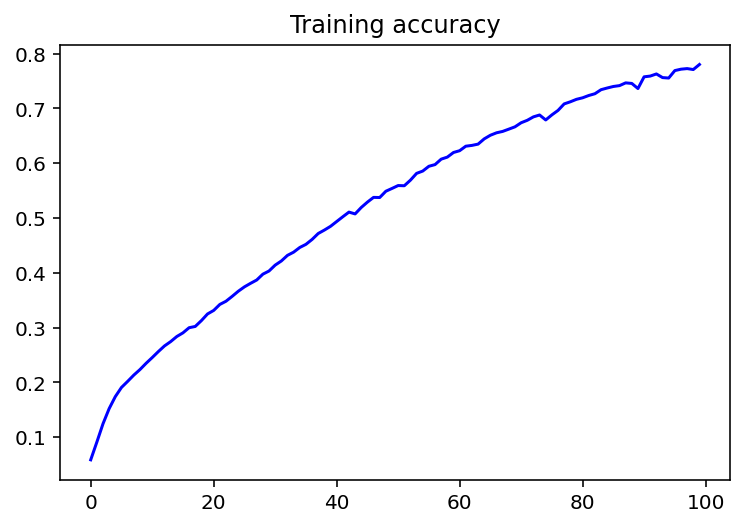

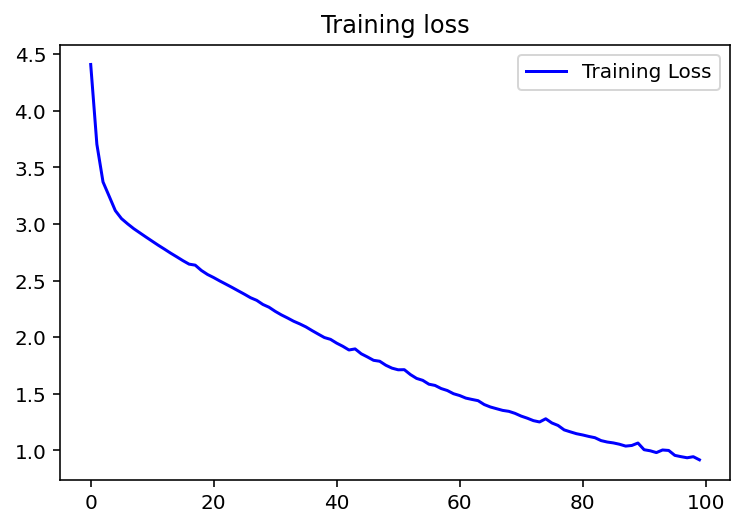

In [46]:

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

Epoch 1/200
280/280 [==============================] - 18s 66ms/step - loss: 1.1578 - accuracy: 0.7023
Epoch 2/200
280/280 [==============================] - 19s 67ms/step - loss: 1.0974 - accuracy: 0.7176
Epoch 3/200
280/280 [==============================] - 18s 65ms/step - loss: 1.0439 - accuracy: 0.7355
Epoch 4/200
280/280 [==============================] - 19s 67ms/step - loss: 1.0639 - accuracy: 0.7295
Epoch 5/200
280/280 [==============================] - 18s 66ms/step - loss: 1.0070 - accuracy: 0.7447
Epoch 6/200
280/280 [==============================] - 19s 67ms/step - loss: 0.9928 - accuracy: 0.7516
Epoch 7/200
280/280 [==============================] - 19s 67ms/step - loss: 0.9360 - accuracy: 0.7681
Epoch 8/200
280/280 [==============================] - 18s 66ms/step - loss: 0.9379 - accuracy: 0.7663
Epoch 9/200
280/280 [==============================] - 18s 66ms/step - loss: 0.9136 - accuracy: 0.7748
Epoch 10/200
280/280 [==============================] - 18s 66ms/step - l

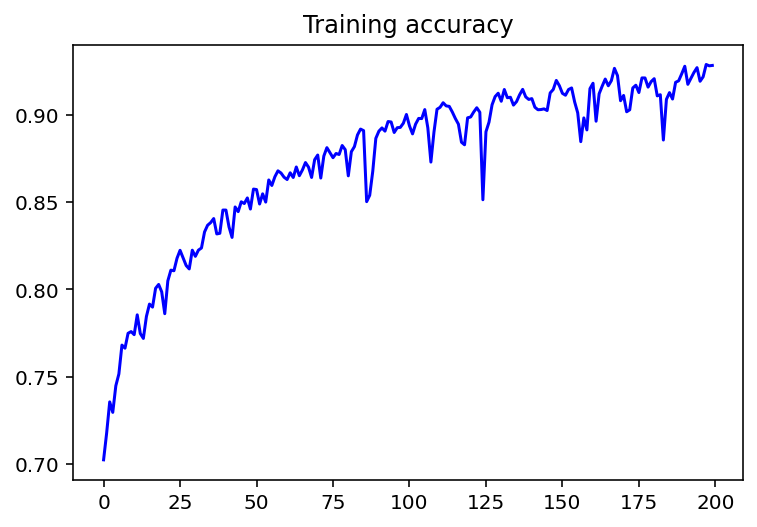

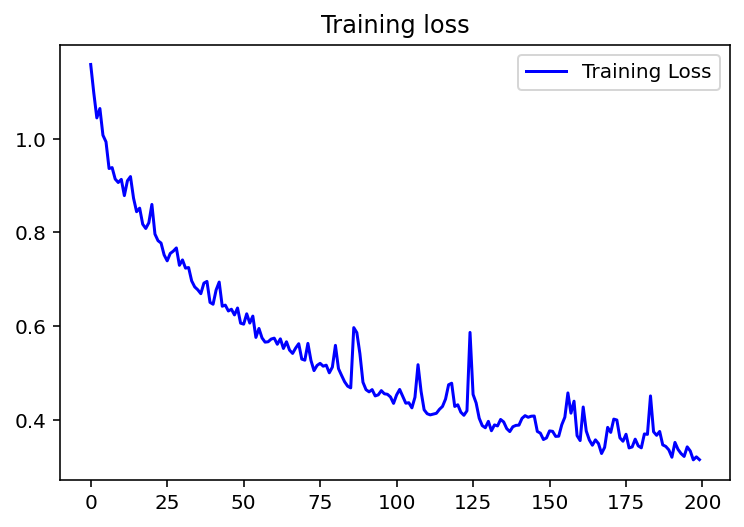

In [47]:
history = model.fit(network_in,label,epochs=200,batch_size=256,verbose=1)
model.save('/content/drive/My Drive/Models/epoch200Test2')

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [48]:
old_model = tf.keras.models.load_model('/content/drive/My Drive/Models/epoch200Test')

old_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          18000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 300)          301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_3 (Dense)              (None, 180)               16380     
Total params: 505,070
Trainable params: 505,070
Non-trainable params: 0
________________________________________________

In [49]:
note_to_int = tokenizer.word_index
int_to_note = {v:k for k,v in note_to_int.items()}
print(int_to_note)

{1: '5', 2: '4', 3: 'b', 4: 'd5', 5: '3', 6: 'c5', 7: 'e', 8: 'e5', 9: 'g5', 10: 'f5', 11: 'c4', 12: 'c', 13: 'a4', 14: 'g4', 15: 'd4', 16: 'f', 17: 'e4', 18: 'a5', 19: 'a3', 20: 'g', 21: 'g3', 22: 'f4', 23: 'b4', 24: 'f3', 25: 'b3', 26: 'c6', 27: 'e3', 28: 'b5', 29: 'd3', 30: 'c3', 31: 'd6', 32: '2', 33: '6', 34: 'a2', 35: '0z4', 36: '4z7', 37: '11z2', 38: '2z5', 39: '9z1', 40: '5z9', 41: '9z0', 42: '3z7', 43: '7z10', 44: '9', 45: '10z2', 46: 'g2', 47: '0z3', 48: '2z6', 49: '7z11', 50: '6z9', 51: '1z4', 52: 'e6', 53: 'b2', 54: '8z11', 55: '7z0', 56: '5z8', 57: '0', 58: 'f6', 59: 'f2', 60: '4z9', 61: '11', 62: '7', 63: '8z0', 64: '9z1z4', 65: '10z0', 66: 'e2', 67: '5z10', 68: '2z7', 69: '9z11', 70: '4z8', 71: '5z7', 72: '10', 73: '5z9z0', 74: '9z2', 75: '11z4', 76: '10z1', 77: '2z6z9', 78: '1', 79: '8', 80: '2z4', 81: 'd2', 82: '0z5', 83: '2z8', 84: '0z4z7', 85: '10z3', 86: '3z6', 87: '7z9', 88: '10z2z5', 89: '2z5z9', 90: '4z10', 91: '3z8', 92: '0z2', 93: '9z0z2', 94: '4z6', 95: '4z8z1

In [50]:
start = np.random.randint(0,len(network_in)-1)



pattern = network_in[start]
prediction_output = []

for i in range(500):
  prediction_in = np.reshape(pattern,(1,len(pattern),1 ))

  prediction = old_model.predict(prediction_in,verbose=0)

  pred_index = np.argmax(prediction)
  result = int_to_note[pred_index]
  prediction_output.append(result)

  pattern = np.append(pattern,pred_index)
  pattern = pattern[1:len(pattern)]


print(prediction_output)

['e5', 'f', '4', 'd5', 'a4', 'g5', 'd4', 'f', '5', 'a4', 'e5', 'f', '4', 'a4', 'a4', 'd5', 'd4', 'a4', 'f', '4', 'a4', 'g4', 'a4', 'g4', 'f', '4', 'a4', 'g4', 'a4', 'g4', 'b4', 'g4', 'd5', 'd6', 'a4', 'g4', 'e5', 'f', '4', 'g4', 'a5', 'a4', 'g4', 'b5', 'g4', '4', 'g4', 'g4', '0', 'd4', 'g4', 'g5', 'e4', 'g4', '4', 'b3', 'g4', 'g4', '7z9', 'd4', 'e4', 'g4', '7z9', 'e4', 'g4', 'a5', 'b5', 'g5', 'd4', 'f', '5', 'd5', 'd4', 'g4', 'd5', 'b3', 'd4', 'g3', 'b3', 'b4', 'b3', 'g4', 'd3', 'g5', 'g4', 'f', '5', 'b3', 'a5', 'd5', 'g5', 'g3', 'd5', 'd4', 'b4', 'g3', 'b4', 'b3', 'g4', 'g3', 'b3', 'b3', 'a4', 'g3', 'd4', 'b3', 'd4', 'g3', 'd4', 'b3', 'd4', 'd5', 'c', '5', 'b4', 'g3', 'd5', 'g4', 'c5', 'g3', 'g3', 'b3', 'd3', 'g4', 'd3', 'b3', 'd5', 'g3', 'b4', 'd4', 'c5', 'g3', 'b4', 'd4', 'f', '3', 'b4', 'b3', 'g4', 'g3', 'g4', 'd4', 'c5', 'e4', 'b4', 'g3', 'd4', 'b3', 'd4', 'd4', 'b4', 'g3', 'b4', 'd4', 'c5', 'a3', 'a4', 'g3', 'a4', 'b3', 'd4', 'g3', 'd4', 'b3', 'd4', 'b4', 'b4', 'd3', 'd4', 'g3', 

In [0]:
offset = 0
output_notes = []

for pattern in prediction_output:
  if('z' in pattern) or pattern.isdigit():
    notes_in_chord = pattern.split('z')
    notes = []
    for curr_note in notes_in_chord:
      new_note = note.Note(int(curr_note))
      new_note.storedInstrument = instrument.Piano()
      notes.append(new_note)
    new_chord=chord.Chord(notes)
    new_chord.offset = offset
    output_notes.append(new_chord)
  else:
    new_note=note.Note(pattern)
    new_note.offset=offset
    new_note.storedInstrument = instrument.Piano()
    output_notes.append(new_note)
  offset += 0.5




In [52]:
midi_stream = stream.Stream(output_notes)
midi_stream.write('midi',fp='/content/drive/My Drive/MidiOut/epoch200Mozart2.mid')

'/content/drive/My Drive/MidiOut/epoch200Mozart.mid'